# **Modern Portfolio Theory**

## **Introduction**

*The aim of this project is to perform an in-depth analysis assosiated with the assumptions of `Modern Portfolio Theory` and
how financial assets interact within the portfolio using sttistical methods*

*`Harry Markowitz` introduced the mean-varinace portfolio selection theory in 1952.Since then the Modern Porfolio theory is 
cornerstone in the field of modern finance*

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
sns.reset_defaults()

## **Data**

*Twelve stock quoted on NYSE are used for the purpose of analysis. The data is between the period of 1st January 2008 to 31st 
December 2017. The data is downloaded using `Twelvedata API` in the `json` format. The stocks are divident adjusted*

|Company| Symbol|
|---|---|
|Apple Inc| AAPL|
|American Express Co| AXP|
|Boeing Co |BA|
|General Electric| GE|
|Johnson & Johnson| JNJ|
|JPMorgan Chase & Co| JPM|
|Coca-Cola Co| KO|
|McDonald's Corp| MCD|
|Microsoft Corp| MSFT|
|Verizon Communications Inc| VZ|
|Walmart Inc |WMT|
|Exxon Mobil Corp| XOM|

In [2]:
# dowloading data using twelve data api
tickers = ["AAPL", "AXP", "BA", "GE","JNJ", "JPM", "KO", "MCD", "MSFT", "VZ",  "WMT", "XOM"]
api_key = "c3e65513d37a417b97f301c64346a30e"
interval = "1day"
start = "2008-01-01"
end = "2018-01-01"
stocks = []
def stock_data(tick):
    url = f'https://api.twelvedata.com/time_series?symbol={tick}&start_date={start}&end_date={end}&interval={interval}&order=ASC&apikey={api_key}'
    data = requests.get(url).json()
    return data["values"]

In [3]:
df = pd.DataFrame()
df["datetime"] = pd.DataFrame(stock_data("AAPL"))["datetime"]
for tick in tickers[:6]:
    df[tick] = pd.DataFrame(stock_data(tick))["close"]

In [4]:
for tick in tickers[6:]:
    df[tick] = pd.DataFrame(stock_data(tick))["close"]

In [5]:
# datetime as index
df["datetime"] = pd.to_datetime(df["datetime"])
df.index = df["datetime"]
df.drop(["datetime"], axis=1, inplace=True)

In [6]:
df.head()

,AAPL,AXP,BA,GE,JNJ,JPM,KO,MCD,MSFT,VZ,WMT,XOM
datetime,,,,,,,,,,,,
2008-01-02,6.95857,51.04000,86.62000,282.76923,65.91000,42.17000,30.54500,58.10000,35.22000,40.33855,46.90000,93.51000
2008-01-03,6.96179,50.41000,86.98000,283.07693,65.93000,41.88000,30.86500,57.93000,35.37000,40.52526,46.38000,93.83000
2008-01-04,6.43036,49.14000,85.82000,277.23077,65.84000,40.93000,30.92500,57.05000,34.38000,39.76908,45.72000,92.08000
2008-01-07,6.34429,49.36000,82.87000,278.30768,66.86000,41.34000,31.65500,58.03000,34.61000,40.46924,46.56000,91.22000
2008-01-08,6.11607,47.95000,79.91000,272.30768,66.94000,39.70000,31.78500,57.08000,33.45000,39.19962,45.97000,90.05000


In [7]:
# any na values
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2008-01-02 to 2017-12-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   AAPL    2518 non-null   object
 1   AXP     2518 non-null   object
 2   BA      2518 non-null   object
 3   GE      2518 non-null   object
 4   JNJ     2518 non-null   object
 5   JPM     2518 non-null   object
 6   KO      2518 non-null   object
 7   MCD     2518 non-null   object
 8   MSFT    2518 non-null   object
 9   VZ      2518 non-null   object
 10  WMT     2518 non-null   object
 11  XOM     2518 non-null   object
dtypes: object(12)
memory usage: 255.7+ KB


In [51]:
df.isna().sum()

AAPL    0
AXP     0
BA      0
GE      0
JNJ     0
JPM     0
KO      0
MCD     0
MSFT    0
VZ      0
WMT     0
XOM     0
dtype: int64

In [8]:
df = df.astype("float")

## **Daily Return** 

*We calculate the daily change in prices of stock using the given formulae*

$r_{asset} = \frac{P_t - P_{t-1}}{P_{t-1}}\times100$

*where*

$P_t$ *is present value of adjusted close price of individual stock*

$P_{t-1}$ *is previous day adjusted close price of individual stock*

$r_{asset}$ *daily return on assest*

In [9]:
df = df.pct_change().dropna()
df = df*100

### **Independent Returns**

*According to `Random Walk Theory` stock price change are independent of past movement trends and therefore next day price cannot
be `predicted` from previous price changes*

*We plot a simple `scatterplot` for our twelve assets where we compare the previous day return against the present value and it
shows absolutely `no correlation` for any of the assets which proves the assmption to be true*

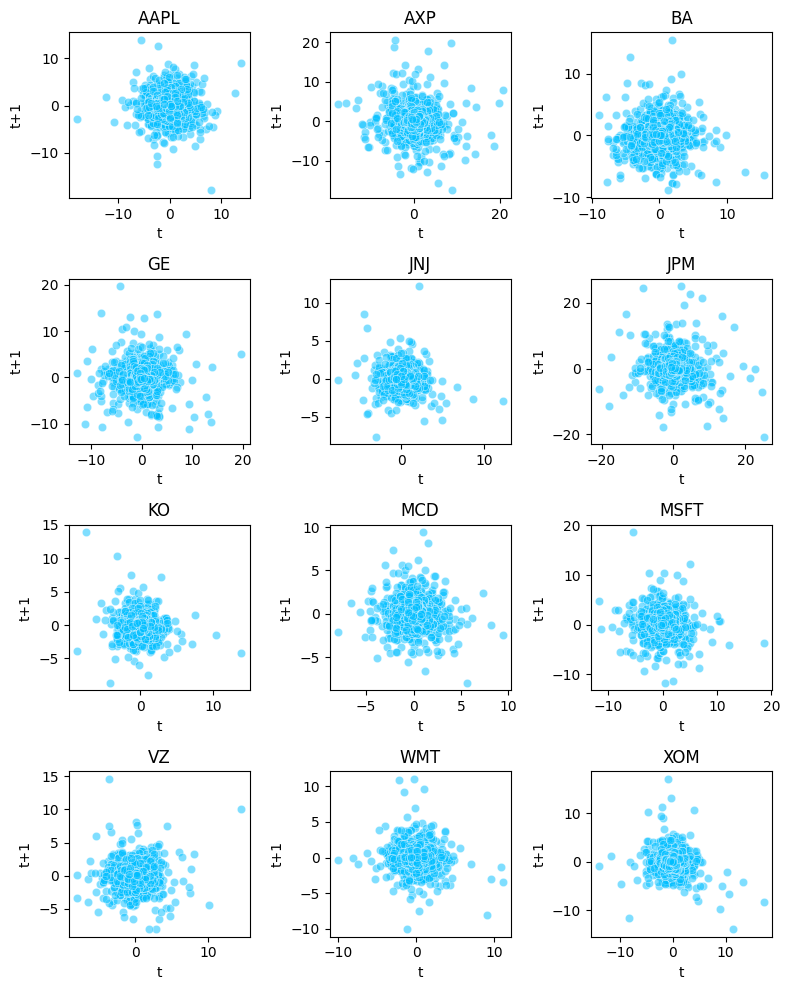

In [15]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(8,10))
tickers = df.columns
x = 0
for i in range(4):
    for j in range(3):
        ax = sns.scatterplot(x=df[tickers[x]], y=df[tickers[x]].shift(1),color="deepskyblue",alpha=0.5, ax=axes[i,j])
        ax.set_title(tickers[x])
        ax.set_xlabel("t")
        ax.set_ylabel("t+1")
        x = x + 1
plt.tight_layout()

### **Distribution of Returns**

*The daily return on assets are collected and represented in the form of `histogram` given in the figure below, from initial analysis 
it seems that most of the stocks closely resemble `normal distribution`. Most of these returns are `concentrated` towards the `mean` 
value but a small portion of these return are scattered at the end of the distribution showing few days where there is `large swing` in price*

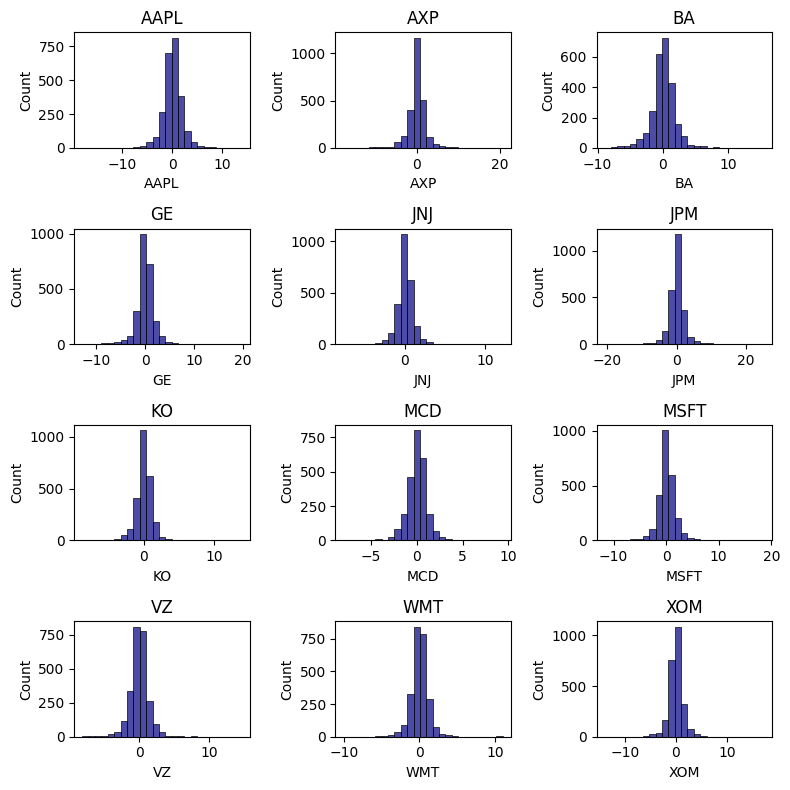

In [16]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(8,8))
tickers = df.columns
x = 0
for i in range(4):
    for j in range(3):
        ax = sns.histplot(df[tickers[x]], bins=25, color="navy", alpha=0.7, ax=axes[i,j])
        ax.set_title(tickers[x])
        x = x + 1
plt.tight_layout()

### **Normal Assumption**

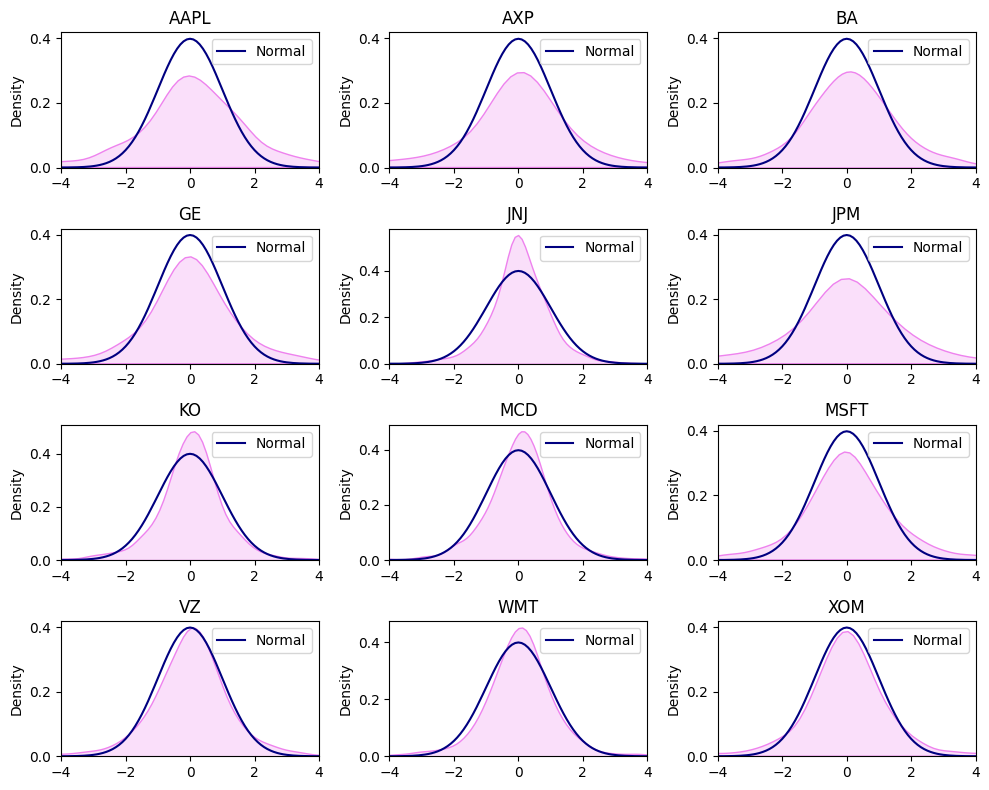

In [17]:
from scipy import stats
tickers = df.columns
xnor = np.arange(-10,10, 0.1)
ynor = stats.norm.pdf(xnor)
x = 0
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10,8))
for i in range(4):
    for j in range(3):
        ax = sns.kdeplot(df[tickers[x]],color="violet", fill=True, ax=axes[i,j])
        sns.lineplot(x=xnor, y=ynor, lw=1.5, color="navy", ax=axes[i,j], label="Normal")
        ax.set_xlim(-4,4)
        ax.set_title(tickers[x])
        ax.set_xlabel("")
        x = x + 1
plt.tight_layout()

### **Mean Return**

In [18]:
pd.DataFrame(df.mean(), columns=["MeanReturn"]).T

,AAPL,AXP,BA,GE,JNJ,JPM,KO,MCD,MSFT,VZ,WMT,XOM
MeanReturn,0.091086,0.056556,0.065166,-0.00972,0.035211,0.074478,0.022987,0.050029,0.050554,0.020278,0.037171,0.007425


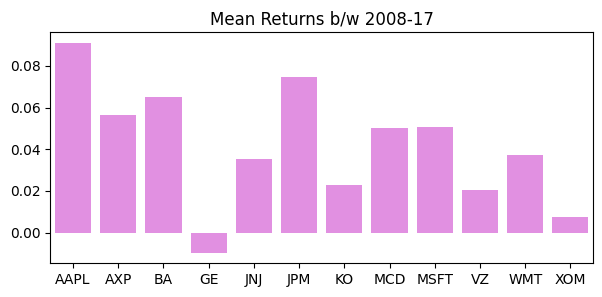

In [19]:
plt.figure(figsize=(7,3))
ax1 = sns.barplot(x=df.columns, y=df.mean(), color="violet")
ax1.set_title("Mean Returns b/w 2008-17");

## **Risk**

*In the context of finance the risk can be defined as the `uncertainty` in the market. Mathematically it
can defined as the `deviation` away from the expected `historical returns` during a particular time
period. A more preferred definition in our context of our analysis is the `degree of making loss` on
a potential investment.There are several statistical methods use to measure financial risk*

### **Standard Deviation**

*Standard Deviation is the most commonly employed method for calculating financial risk. It can be expressed as.*

$sd_{asset} = \sqrt{\frac{\sum_(x_i - \mu)^2}{N}}$

where

$N$ is the total number of daily returns observed,

$x_i$ is daily observed return,

$\mu$ is mean return observed during N days.

*The `greater` the Standard Deviation of the security the `more risky` the asset is (in relative terms). The
Standard Deviation calculates the `historical volatility` of the security, greater the `dispersion` from the
`mean` value indicates more `volatile` asset. From the table we can observe that JNJ is least risky asset
with standard deviation of 1.0321% while JPM is the most risky asset with standard deviation of
2.733%.*

In [20]:
pd.DataFrame(df.std(), columns=["SD"]).T

,AAPL,AXP,BA,GE,JNJ,JPM,KO,MCD,MSFT,VZ,WMT,XOM
SD,1.963429,2.460442,1.817686,1.996712,1.037305,2.756387,1.171051,1.17366,1.752709,1.380439,1.233441,1.543052


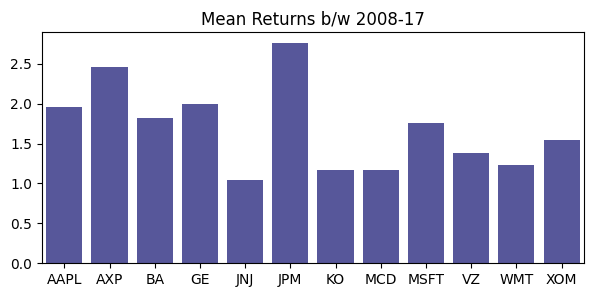

In [21]:
plt.figure(figsize=(7,3))
ax1 = sns.barplot(x=df.columns, y=df.std(), color="navy", alpha=0.7)
ax1.set_title("Mean Returns b/w 2008-17");

### **Volatility Clustering**

*A more `preferable` method is using the `daily volatility` clustering technique which helps in `visualizing` the volatility at
`specific` periods in time.From Figure we can observe that the period between the year `2008 to 2010` was extremely volatile
period due to rapid change in the stock prices from their mean value, the contributing factor for this
rapid movement was in response to the `subprime mortgage crises` in US due to which their was a
large scale financial panic in the market. After the `US government` intervened in the financial
markets to calm `down` the rapid volatility in the market, the price movement started to become less
intense.*

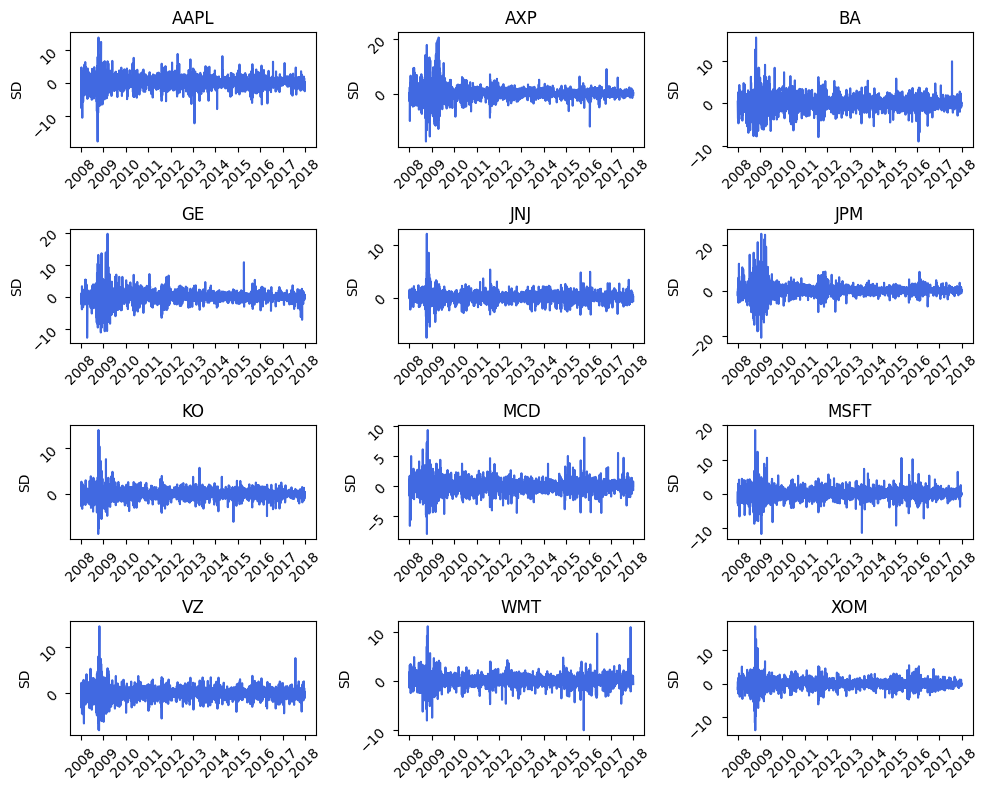

In [22]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10,8))
tickers = df.columns
x = 0
for i in range(4):
    for j in range(3):
        ax = sns.lineplot(x=df.index, y=df[tickers[x]],color="royalblue",alpha=1, ax=axes[i,j])
        ax.tick_params(labelrotation=45)
        ax.set_title(tickers[x])
        ax.set_xlabel("")
        ax.set_ylabel("SD")
        x = x + 1
plt.tight_layout()

### **Correlation among assets**

*Markowitz (1952) argued that the `individual` risk pertaining to an asset is `not` as much important as the `contribution` of risk 
from `each` asset to the aggregate portfolio.In the financial markets only those `risk` are `compensated` that `cannot` be avoided.*

*In the financial market no two financial assets are either completely correlated or completely
independent of each other, to some degree each asset is `interrelated` to the `movement` of the prices of
another asset , some assets have very high degree of co-movement while some have less exposure to
each other. The Modern Portfolio Theory attempts to analyze the `interrelationship` between different
investments. It utilizes statistical measures such as `correlation` to quantify the diversification effect
on portfolio*

*The extent to which the risk of the portfolio can be reduced largely depends on the `covariance`
between different assets. Portfolio assets which have `low` correlation coefficients are considered to
be `less` risky than pairs with high coefficients*

*Within the portfolio of`N` assets there are N variances and `N(N-1)` covariance. As the number of
assets in the portfolio increases the number of covariance `increases` rapidly. This large number of
covariance are very `important`towards determining the risk of the portfolio.*

*In the Figure  we can observe that at the start of the year `2008` the correlation among the assets
were `low`as the `crises` took of , the correlation start to become `stronger` between the various `pairs` of
asset. In the year between `2009` and `2013` we can see a high correlation among the assets which can
be attributed to the `increase` in `systematic risk` due to `panic` in the US financial industry. After 2013
the correlation among the pairs of asset start to `decline` due to decrease in systematic risk. During the time of financial 
stress the correlation among the pairs of the portfolio becomes very `high` due to intense `volatility` in the market.*

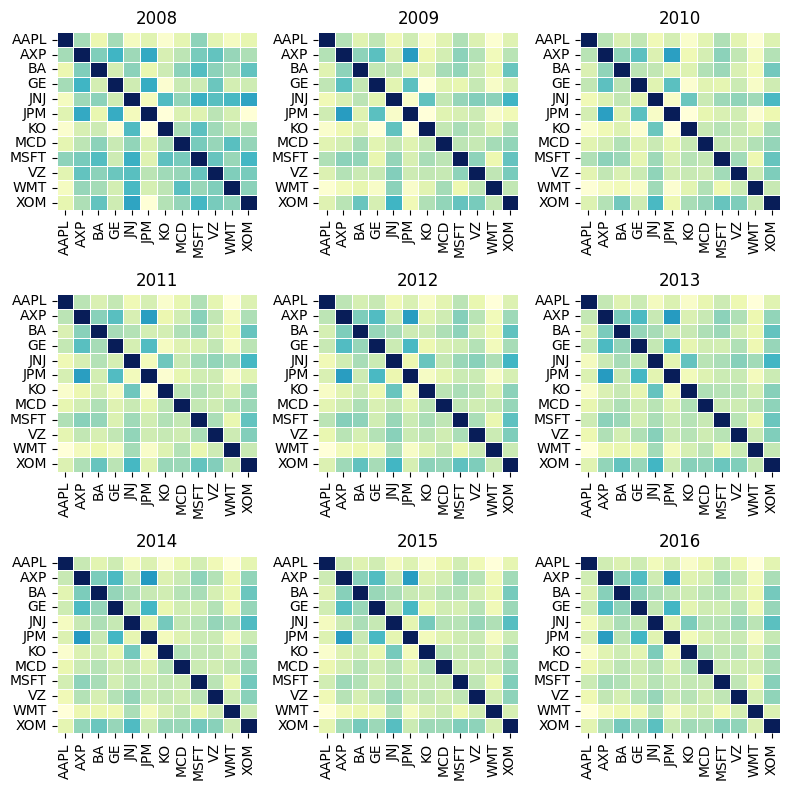

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8,8))
periods =["2008-12-31", "2009-12-31","2010-12-31","2011-12-31","2012-12-31","2013-12-31","2014-12-31","2015-12-31","2016-12-31"]
x = 0
for i in range(3):
    for j in range(3):
        ax = sns.heatmap((df[:periods[x]].corr()), lw=0.5, cmap="YlGnBu", cbar=False, ax=axes[i,j])
        ax.set_title(periods[x][:4])
        x = x + 1
plt.tight_layout()

## **Sharpe Ratio**

*Sharpe ratio give insight to the investor what he is getting as a return on a security for the unit amount of risk he is taking. 
Sharpe ratio is calculated using* 

$\color{red}{Sharpe Ratio} = \frac{R_{asset}-R_f}{\sigma_{assest}}$

where 
$R_{asset}$ return on asset

$R_f$ risk free rate

$\sigma_{asset}$ SD of asset

*Modern Portfolio theory sttes that adding assets to a portfolio that have `low` correlation can `decrease` portfolio `risk` without
sacrificing the return. The `larger` the `sharpe ratio` the `better` it is for portfolio*

In [24]:
pd.DataFrame(df.mean()/df.std(), columns=["Sharpe Ratio"]).T

,AAPL,AXP,BA,GE,JNJ,JPM,KO,MCD,MSFT,VZ,WMT,XOM
Sharpe Ratio,0.046391,0.022986,0.035851,-0.004868,0.033944,0.02702,0.019629,0.042627,0.028843,0.01469,0.030136,0.004812


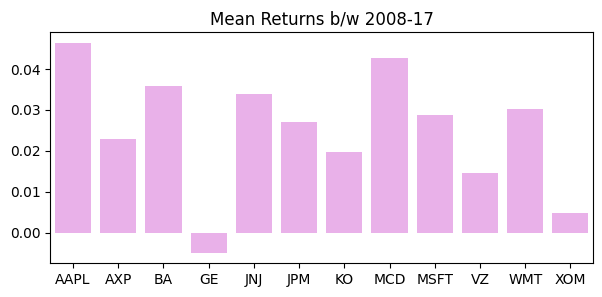

In [25]:
plt.figure(figsize=(7,3))
ax1 = sns.barplot(x=df.columns, y=df.mean()/df.std(), color="violet", alpha=0.7)
ax1.set_title("Mean Returns b/w 2008-17");

## **Diversification Effect**

*The effect of diversification is of central importance to Modern Portfolio Theory. The process of
diversification suggests the investor to `invest` in `multiple assets` across different asset classes and
industries. As the number of securities in the portfolio `increases` the portfolio become `less` risk
inherent.*

*But the `decreases` is `non linear` in nature. As in the Figure we can observe that as the number of
assets increase (equal weighted portfolio) the standard deviation decreases at a `diminishing rate`,
after adding a certain number of assets if we add more assets to the portfolio it does `not` have much
impact in `decreasing` the portfolio risk because some risk will always remain in the form of
systematic risk which cannot be reduced.*

In [26]:
dec_sd = df.std().sort_values(ascending=False).index
wport_sd =[]
for i in range(1,13):
    equal_weight = np.repeat(1/i, i).reshape(-1,1)
    covar = df.loc[:,dec_sd[:i]].cov().to_numpy()
    sd = np.sqrt(np.dot(equal_weight.T,np.dot(covar, equal_weight)))
    wport_sd.append(sd)
wport_sd = np.array(wport_sd).reshape(12,)

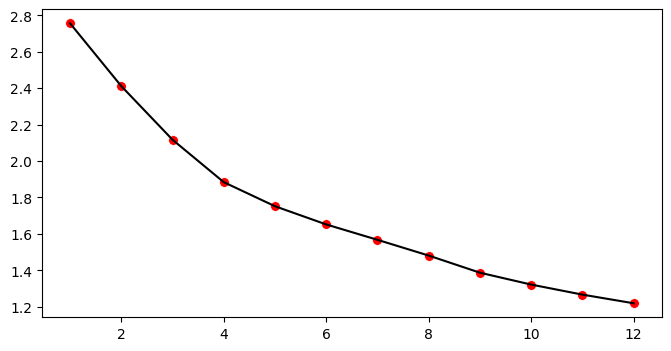

In [27]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=range(1,13), y=wport_sd, color="red", s=50, legend=False)
sns.lineplot(x=range(1,13), y=wport_sd, color="black", legend=False);

*From Volatility clustering we can conclude that portfolio returns are much less volatile than any single stock return* 

In [28]:
dates = df.index
freq_assets = df.shape[1]
daily_returns = []
weight = np.repeat(1/freq_assets, freq_assets).reshape(-1,1)
for date in dates:
    asset_return = df.loc[date].to_numpy()
    port_return = np.dot(weight.T, asset_return)
    daily_returns.append(port_return)

In [29]:
portfolio_return = np.array(daily_returns).reshape(df.shape[0],)

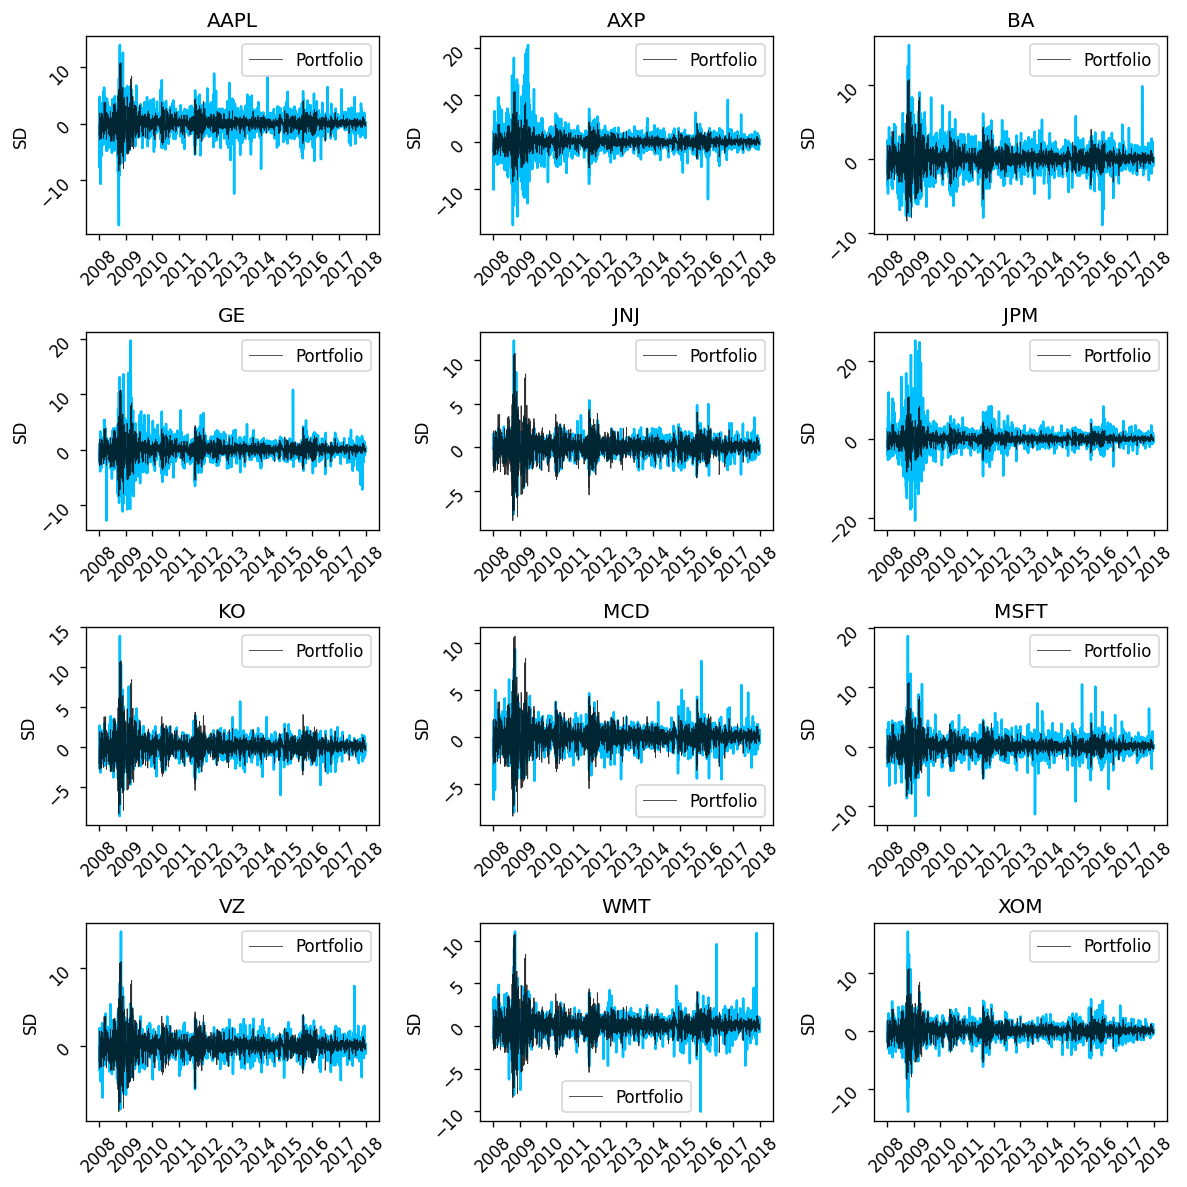

In [30]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10),dpi=120)
tickers = df.columns
x = 0
for i in range(4):
    for j in range(3):
        ax = sns.lineplot(x=df.index, y=df[tickers[x]],color="deepskyblue",alpha=1, ax=axes[i,j])
        sns.lineplot(x=df.index, y=portfolio_return, color="black",linewidth=0.5, alpha=0.8, ax=axes[i,j], label="Portfolio")
        ax.tick_params(labelrotation=45)
        ax.set_title(tickers[x])
        ax.set_xlabel("")
        ax.set_ylabel("SD")
        x = x + 1
plt.tight_layout()

## **Efficient Portfolios** 

*Markowitz concluded that out of `infinite` portfolio that can be constructed by assigning different
`weights` to the portfolio (of the 12 stocks) there will be one `efficient portfolio` which gives an investor `maximum 
return` for a given `amount of risk`. The investor would always `prefer` the portfolio
over the other inefficient portfolios because it `maximizes` his `utility`*

*Using computer `simulation` we have generated more than 50,000 randomly weighted portfolios out
of the 12 stocks and plotted their expected return and standard deviation.*

*From the Figure we can observe that these random portfolios constitutes a `parabolic curve`. At the
`edge` of these curve lie the `efficient` portfolios which investor `prefer` over other portfolios based on
their utility.*

In [31]:
row = 50000
col = 12
random = np.random.normal(size=row*col).reshape(row,col)
sum_ = random.sum(axis=1)
weights = []
for idx in range(row):
    weight = random[idx]/sum_[idx]
    weights.append(weight)
weights = np.array(weights)

In [32]:
mean = []
sd = []
covar = np.array(df.cov())
daily_mean = np.array(df.mean())
for idx in range(weights.shape[0]):
    w = weights[idx].reshape(-1,1)
    port_mean = np.dot(w.T,daily_mean)
    port_sd = np.sqrt(np.dot(w.T, np.dot(covar,w)))
    mean.append(port_mean)
    sd.append(port_sd)
mean = np.array(mean).reshape(row,)
sd = np.array(sd).reshape(row,)
sharpe = mean/sd

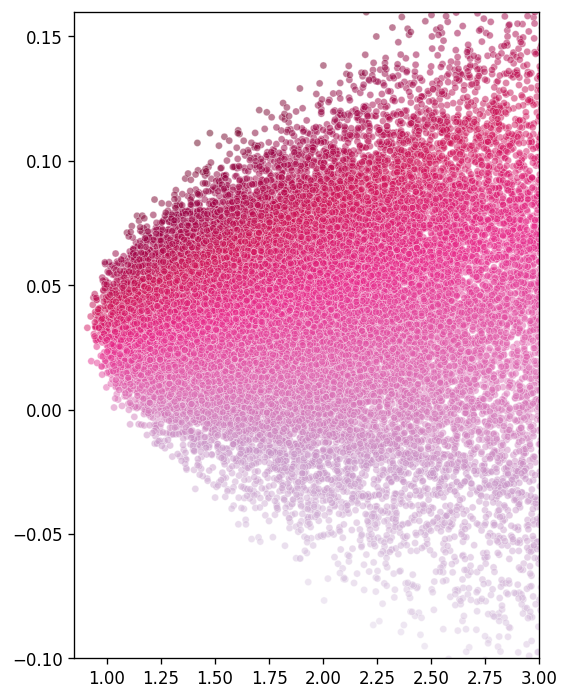

In [33]:
plt.figure(figsize=(5,7),dpi=120)
ax = sns.scatterplot(x=sd, y=mean, color="red", size= 2,alpha=0.5, hue=sharpe, palette="PuRd", legend=False)
ax.set_xlim(0.85,3)
ax.set_ylim(-0.1,0.16);